In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

red_wine_data = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('winequality-white.csv', delimiter=';')

In [2]:
# Basic exploration of the red wine dataset
red_wine_data.head()
red_wine_data.info()
red_wine_data.describe()

# Basic exploration of the white wine dataset
white_wine_data.head()
white_wine_data.info()
white_wine_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


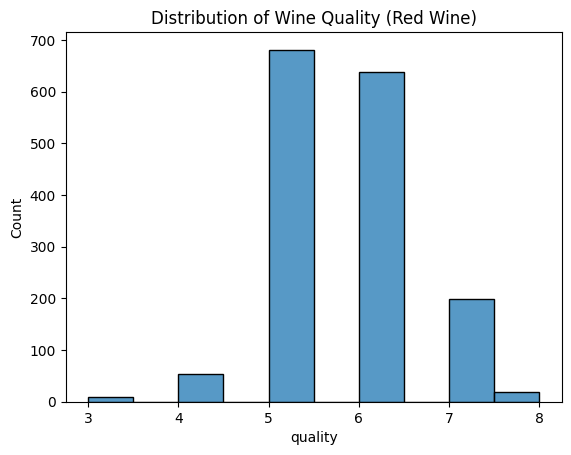

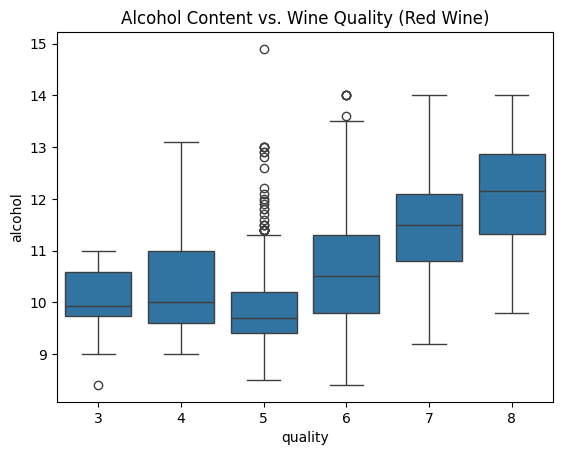

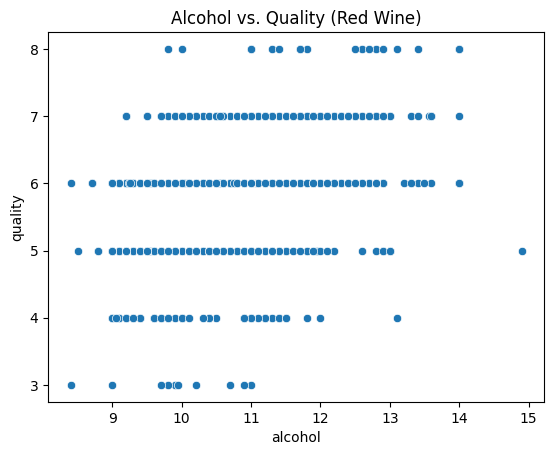

In [13]:
# Visualizing distributions of important features for red wine
sns.histplot(red_wine_data['quality'], kde=False, bins=10)
plt.title('Distribution of Wine Quality (Red Wine)')
plt.show()

# Boxplot of alcohol content
sns.boxplot(data=red_wine_data, x='quality', y='alcohol')
plt.title('Alcohol Content vs. Wine Quality (Red Wine)')
plt.show()

# Scatter plot to show correlation between alcohol and quality
sns.scatterplot(data=red_wine_data, x='alcohol', y='quality')
plt.title('Alcohol vs. Quality (Red Wine)')
plt.show()

###Hypothesis Formulation
- Hypothesis 1: There is a positive correlation between alcohol content and wine quality.
- Hypothesis 2: Higher levels of volatile acidity are associated with lower wine quality.

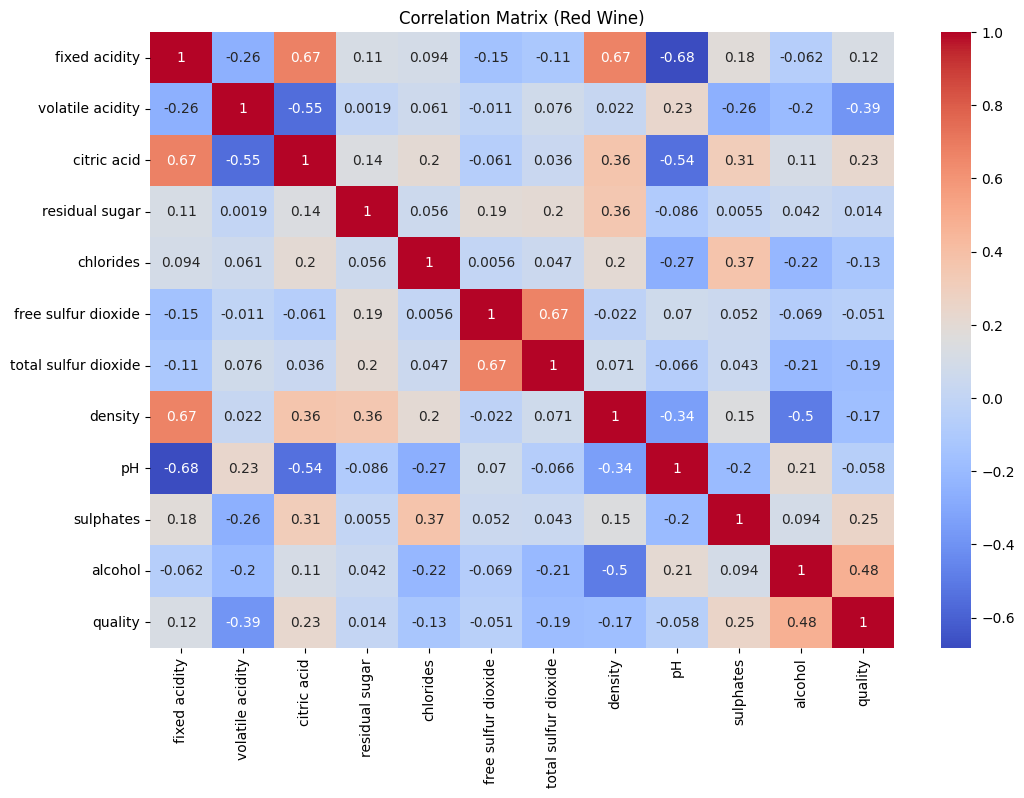

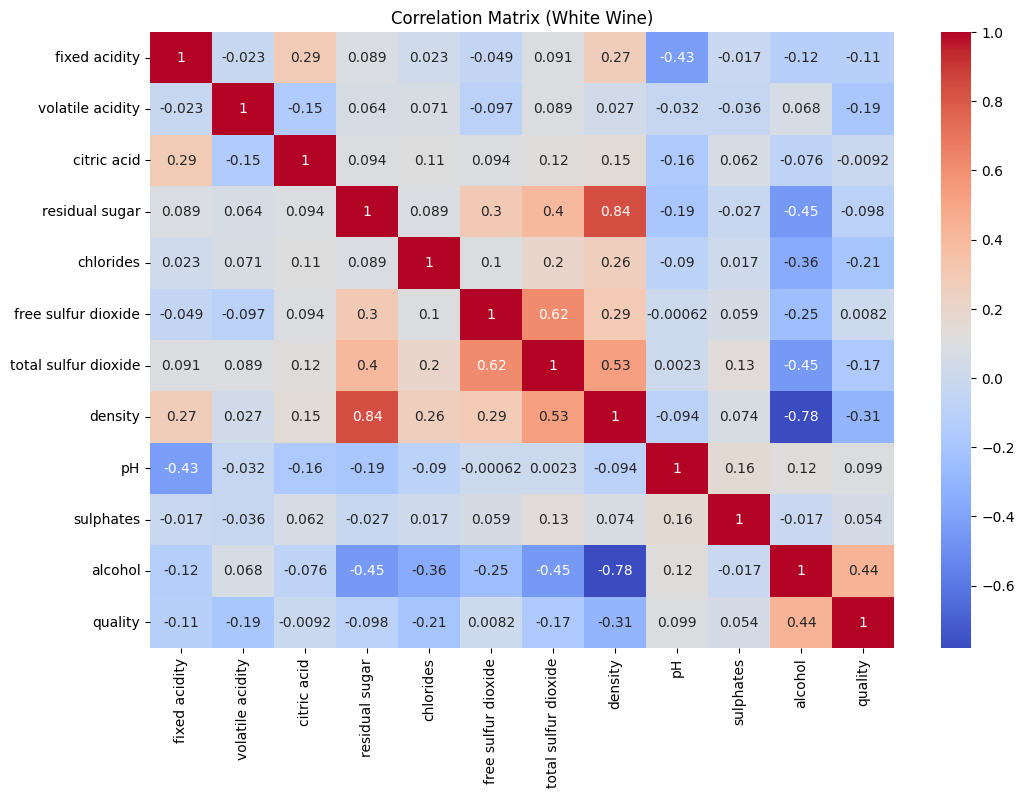

In [9]:
# Correlation matrix for red wine
plt.figure(figsize=(12, 8))
corr_matrix_red = red_wine_data.corr()
sns.heatmap(corr_matrix_red, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix (Red Wine)')
plt.show()

# Correlation matrix for white wine
plt.figure(figsize=(12, 8))
corr_matrix_white = white_wine_data.corr()
sns.heatmap(corr_matrix_white, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix (White Wine)')
plt.show()


In [14]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation for red wine
pearson_corr, _ = pearsonr(red_wine_data['alcohol'], red_wine_data['quality'])
print(f'Pearson correlation between alcohol and quality (Red Wine): {pearson_corr}')

# Pearson correlation for white wine
pearson_corr_white, _ = pearsonr(white_wine_data['alcohol'], white_wine_data['quality'])
print(f'Pearson correlation between alcohol and quality (White Wine): {pearson_corr_white}')


Pearson correlation between alcohol and quality (Red Wine): 0.47616632400113607
Pearson correlation between alcohol and quality (White Wine): 0.4355747154613733


In [15]:
from scipy.stats import ttest_ind

# Example: Split red wine data into high alcohol (>10%) and low alcohol (<10%) groups
high_alcohol = red_wine_data[red_wine_data['alcohol'] > 10]
low_alcohol = red_wine_data[red_wine_data['alcohol'] <= 10]

# t-test
t_stat, p_value = ttest_ind(high_alcohol['quality'], low_alcohol['quality'])
print(f'T-test between high and low alcohol content: T-stat={t_stat}, P-value={p_value}')


T-test between high and low alcohol content: T-stat=17.15894925897105, P-value=1.0584977770451115e-60


In [16]:
# Pearson correlation between volatile acidity and quality for red and white wine datasets
# Red wine
vol_acid_quality_corr_red = red_wine_data['volatile acidity'].corr(red_wine_data['quality'])
# White wine
vol_acid_quality_corr_white = white_wine_data['volatile acidity'].corr(white_wine_data['quality'])

(vol_acid_quality_corr_red, vol_acid_quality_corr_white)


(-0.390557780264007, -0.19472296892113414)

**Hypothesis 1: There is a positive correlation between alcohol content and wine quality.**
- Red Wine: A moderate positive correlation (0.476) was found, meaning higher alcohol content is associated with better wine quality. The t-test confirms a significant difference in quality between high- and low-alcohol wines.
- White Wine: A moderate positive correlation (0.436) also supports the hypothesis that higher alcohol content improves quality.

**Hypothesis 2: Higher levels of volatile acidity are associated with lower wine quality.**
- Red Wine: A moderate negative correlation (-0.391) shows that higher volatile acidity leads to lower wine quality.
- White Wine: A weak negative correlation (-0.195) suggests volatile acidity has a smaller negative impact on white wine quality.

Both hypotheses are supported, with stronger effects in red wines for both alcohol and volatile acidity.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = red_wine_data.drop('quality', axis=1)
y = red_wine_data['quality']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.3900251439639545


The linear regression model achieved a Mean Squared Error (MSE) of 0.39, indicating reasonably accurate predictions of wine quality based on chemical properties. While the model performs well, there is room for improvement through advanced models or feature engineering to further enhance accuracy. Overall, the model provides a good foundation for understanding the relationship between wine quality and its chemical features.